# Applied Regression and Time Series Analysis

# Homework 1: OLS Estimation

### W271-4

Lei Yang

Subhashini R

Ron Cordell

## Question 1:

Load the birthweight dataset. Note that the actual data is provided in a data table named ”data”.
Use the following procedures to load the data:
- Step 1: put the provided R Workspace birthweight w271.RData in the directory of your choice.
- Step 2: Load the dataset using this command: load(“birthweight.Rdata”)

In [2]:
# Load the data from the birthweight_w271.Rdata file
load("birthweight_w271.Rdata")

In [12]:
library(car)

In [3]:
ls()

[1] "data" "desc"

## Question 2:
Examine the basic structure of the data set using desc, str, and summary to examine all of the variables in the data set. How many variables and observations in the data?
These commands will be useful:
- desc
- str(data)
- summary(data)

In [5]:
desc

variable                          label
1    faminc     1988 family income, $1000s
2    cigtax   cig. tax in home state, 1988
3  cigprice cig. price in home state, 1988
4     bwght           birth weight, ounces
5  fatheduc           father's yrs of educ
6  motheduc           mother's yrs of educ
7    parity           birth order of child
8      male               =1 if male child
9     white                    =1 if white
10     cigs  cigs smked per day while preg
11   lbwght                   log of bwght
12 bwghtlbs           birth weight, pounds
13    packs packs smked per day while preg
14  lfaminc                    log(faminc)

In [17]:
str(data)

'data.frame':	1388 obs. of  14 variables:
 $ faminc  : num  13.5 7.5 0.5 15.5 27.5 7.5 65 27.5 27.5 37.5 ...
 $ cigtax  : num  16.5 16.5 16.5 16.5 16.5 16.5 16.5 16.5 16.5 16.5 ...
 $ cigprice: num  122 122 122 122 122 ...
 $ bwght   : num  109 133 129 126 134 118 140 86 121 129 ...
 $ fatheduc: int  12 6 NA 12 14 12 16 12 12 16 ...
 $ motheduc: int  12 12 12 12 12 14 14 14 17 18 ...
 $ parity  : int  1 2 2 2 2 6 2 2 2 2 ...
 $ male    : int  1 1 0 1 1 1 0 0 0 0 ...
 $ white   : int  1 0 0 0 1 0 1 0 1 1 ...
 $ cigs    : int  0 0 0 0 0 0 0 0 0 0 ...
 $ lbwght  : num  4.69 4.89 4.86 4.84 4.9 ...
 $ bwghtlbs: num  6.81 8.31 8.06 7.88 8.38 ...
 $ packs   : num  0 0 0 0 0 0 0 0 0 0 ...
 $ lfaminc : num  2.603 2.015 -0.693 2.741 3.314 ...
 - attr(*, "datalabel")= chr ""
 - attr(*, "time.stamp")= chr "25 Jun 2011 23:03"
 - attr(*, "formats")= chr  "%9.0g" "%9.0g" "%9.0g" "%8.0g" ...
 - attr(*, "types")= int  254 254 254 252 251 251 251 251 251 251 ...
 - attr(*, "val.labels")= chr  "" "" "" "

In [18]:
summary(data)

     faminc          cigtax         cigprice         bwght      
 Min.   : 0.50   Min.   : 2.00   Min.   :103.8   Min.   :  0.0  
 1st Qu.:14.50   1st Qu.:15.00   1st Qu.:122.8   1st Qu.:106.0  
 Median :27.50   Median :20.00   Median :130.8   Median :119.0  
 Mean   :29.03   Mean   :19.55   Mean   :130.6   Mean   :117.9  
 3rd Qu.:37.50   3rd Qu.:26.00   3rd Qu.:137.0   3rd Qu.:132.0  
 Max.   :65.00   Max.   :38.00   Max.   :152.5   Max.   :271.0  
                                                                
    fatheduc        motheduc         parity           male       
 Min.   : 1.00   Min.   : 2.00   Min.   :1.000   Min.   :0.0000  
 1st Qu.:12.00   1st Qu.:12.00   1st Qu.:1.000   1st Qu.:0.0000  
 Median :12.00   Median :12.00   Median :1.000   Median :1.0000  
 Mean   :13.19   Mean   :12.94   Mean   :1.633   Mean   :0.5209  
 3rd Qu.:16.00   3rd Qu.:14.00   3rd Qu.:2.000   3rd Qu.:1.0000  
 Max.   :18.00   Max.   :18.00   Max.   :6.000   Max.   :1.0000  
 NA's   :196     N

**There are 1388 observations of 14 variables**

## Question 3:
As we mentioned in the live session, it is important to start with a question (or a hypothesis) when conducting regression modeling. In this execrise, we are in the question: ”Do mothers who smoke have babies with lower birth weight?”
The dependent variable of interested is bwght, representing birthweight in ounces. Examine this variable using both tabulated summary and graphs. Specifically,
1. Summarize the variable bwght: `summary(data$bwght)`
2. You may also use the quantile function: `quantile(data$bwght)`. List the following
quantiles: 1%, 5%, 10%, 25%, 50%, 75%, 90%, 95%, 99%
3. Plot the histogram of bwght and comment on the shape of its distribution. Try different bin sizes and comment how it affects the shape of the histogram. Remember to label the graph clearly. You will also need a title for the graph.
4. This is a more open-ended question: Have you noticed anything ”strange” with the bwght variable and the shape of histogram this variable? If so, please elaborate on your observations and investigate any issues you have identified.


In [19]:
summary(data$bwght)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    0.0   106.0   119.0   117.9   132.0   271.0 

In [24]:
quantile(data$bwght, probs=c(1,5,10,25,50,75,90,99, NA)/100)

1%     5%    10%    25%    50%    75%    90%    99%        
 42.35  83.00  93.00 106.00 119.00 132.00 143.00 160.13     NA

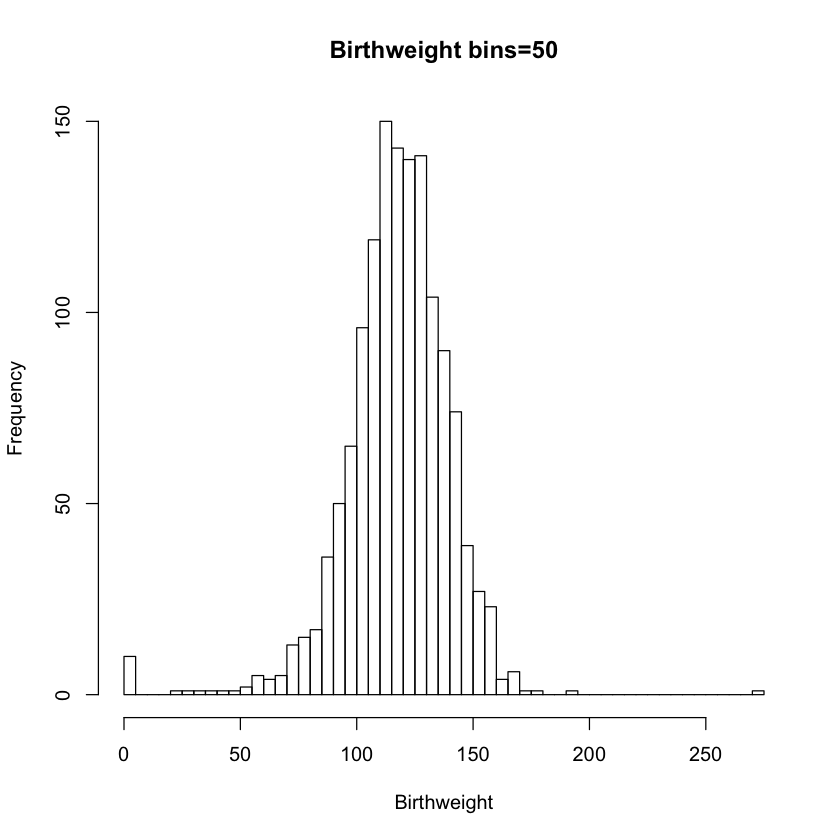

In [105]:
hist(data$bwght, main='Birthweight bins=50', xlab='Birthweight', breaks=50)

Setting the binning to break=50 reveals finer structure in the data. One obvious point is that there is an outlier data point beyond the 250 mark, which skews the visual appearance of the data. There are also birthweights of 0 which should be treated as NA.

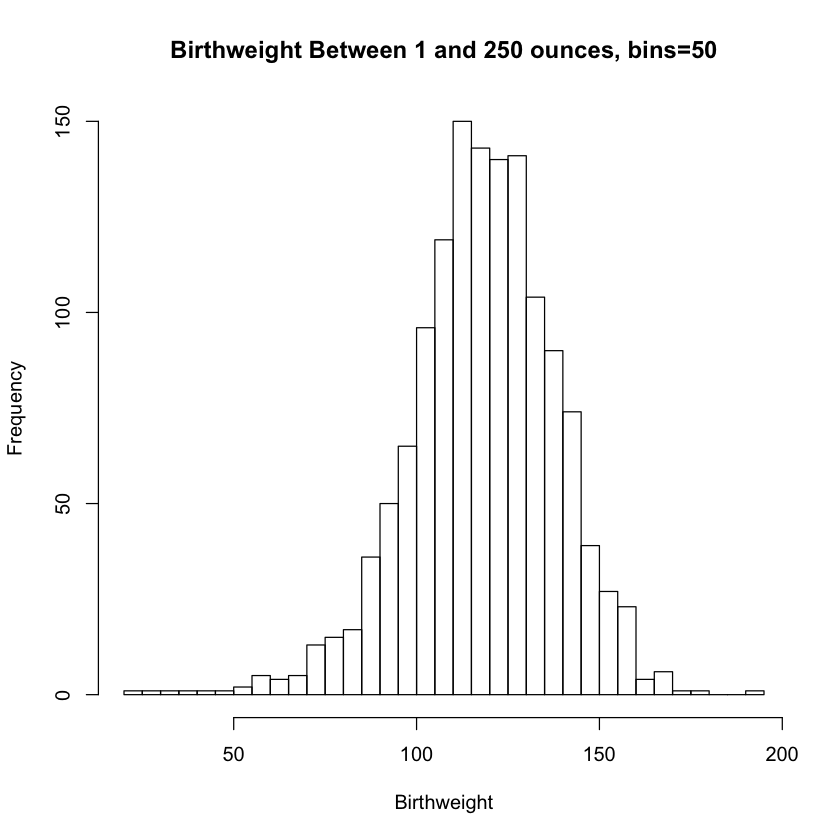

In [106]:
hist(data$bwght[data$bwght<250 & data$bwght>0], main='Birthweight Between 1 and 250 ounces, bins=50',
                                                xlab='Birthweight', breaks=50)

Removing the outliers by filtering out those data points greater than 250 shows that the distribution is slightly longer left-tailed but otherwise normal-like.

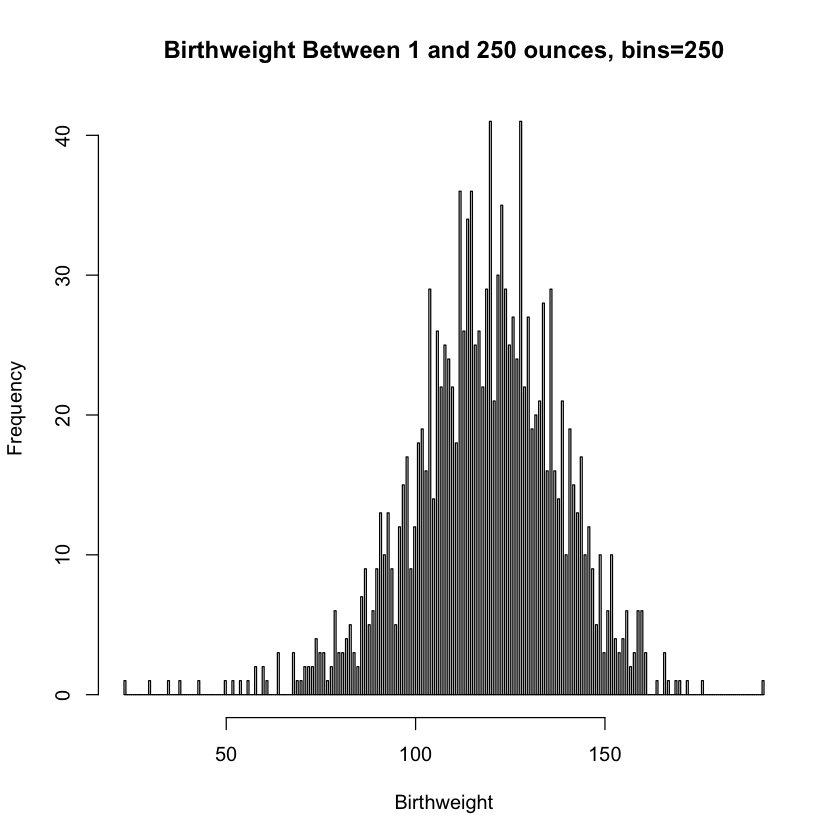

In [107]:
hist(data$bwght[data$bwght<250 & data$bwght>0], main='Birthweight Between 1 and 250 ounces, bins=250',
                                                xlab='Birthweight', breaks=250)

As we increase the number of bins we see more variance indicated in the graph.

### Boxplot of Birthweight

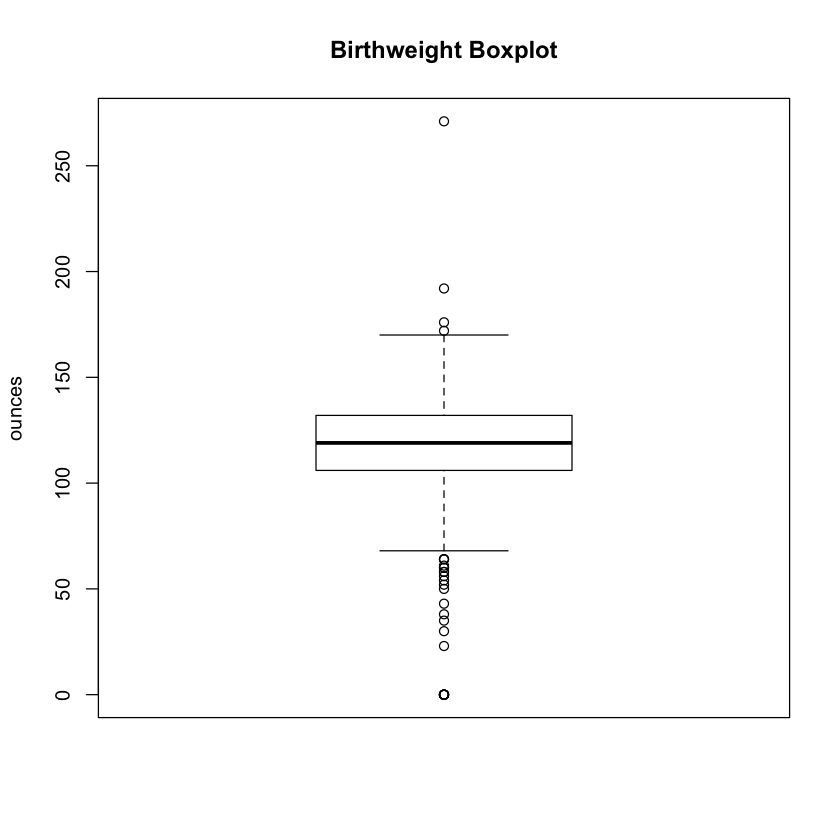

In [17]:
boxplot(data$bwght, data=data, main = "Birthweight Boxplot", ylab=("ounces"))

The boxplot corresponds the histogram in that it shows that the distribution tends towards the mean with a narrow spread. There is also the longer spread of values on the bottom than on the top, similar to the long left tail of the histogram.

## Question 4:
Examine the variable cigs, which represents number of cigarettes smoked each day by the mother while pregnant. Conduct the same analysis as in question 3.

In [40]:
summary(data$cigs)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   0.000   0.000   2.087   0.000  50.000 

In [41]:
quantile(data$cigs, probs=c(1,5,10,25,50,75,90,99, NA)/100)

1%  5% 10% 25% 50% 75% 90% 99%     
  0   0   0   0   0   0  10  20  NA

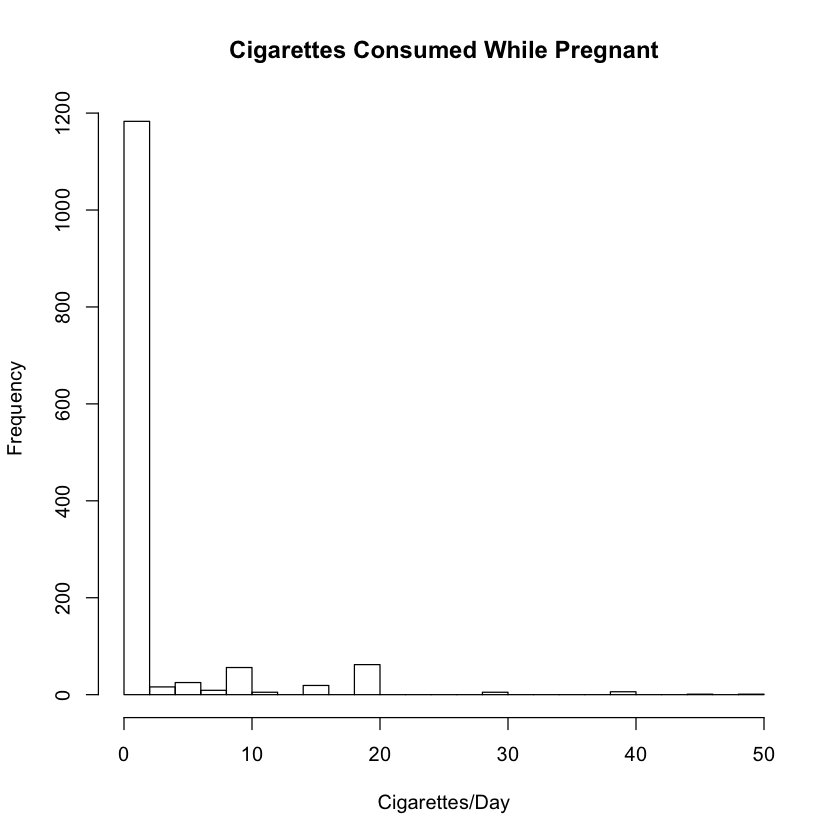

In [31]:
hist(data$cigs, main='Cigarettes Consumed While Pregnant', xlab='Cigarettes/Day', breaks=25)

The histogram for cigarettes per day shows a very large spike for all the 0 values in the data set. Filtering out the zero values gives a better sense for the relative frequencies of the non-zero values, shown below.

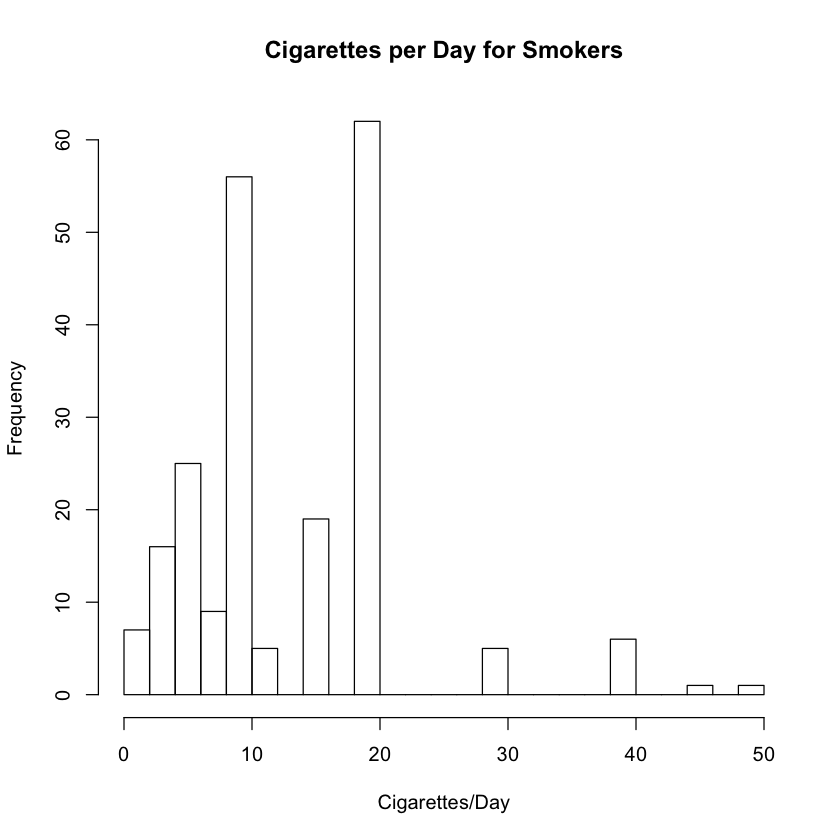

In [30]:
hist(data$cigs[data$cigs>0], main='Cigarettes per Day for Smokers', xlab='Cigarettes/Day', breaks=25)

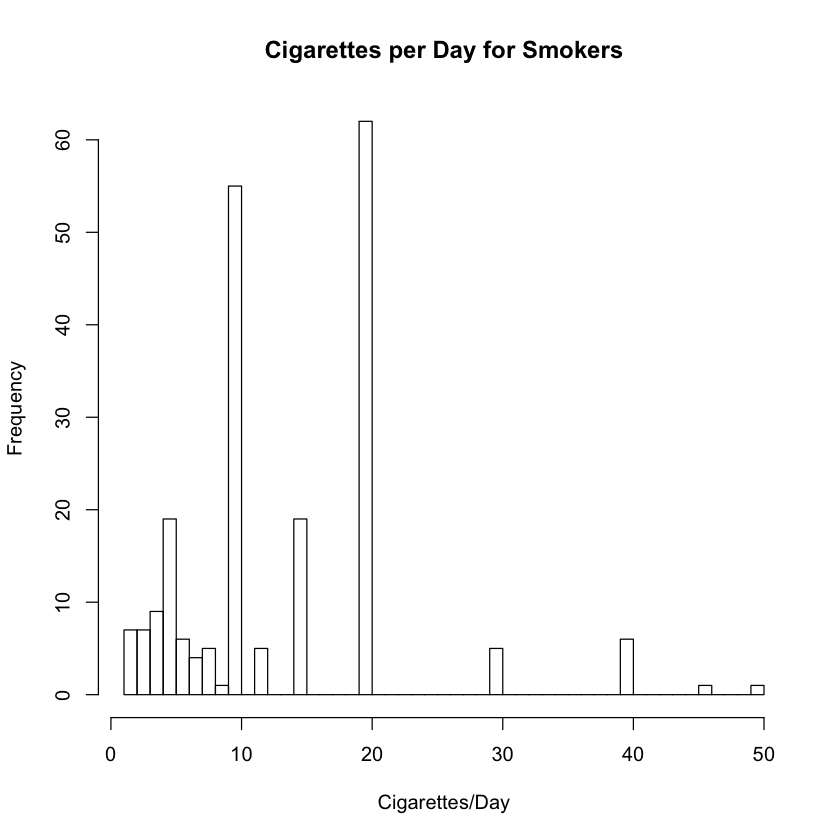

In [50]:
hist(data$cigs[data$cigs>0], main='Cigarettes per Day for Smokers', xlab='Cigarettes/Day', breaks=50)

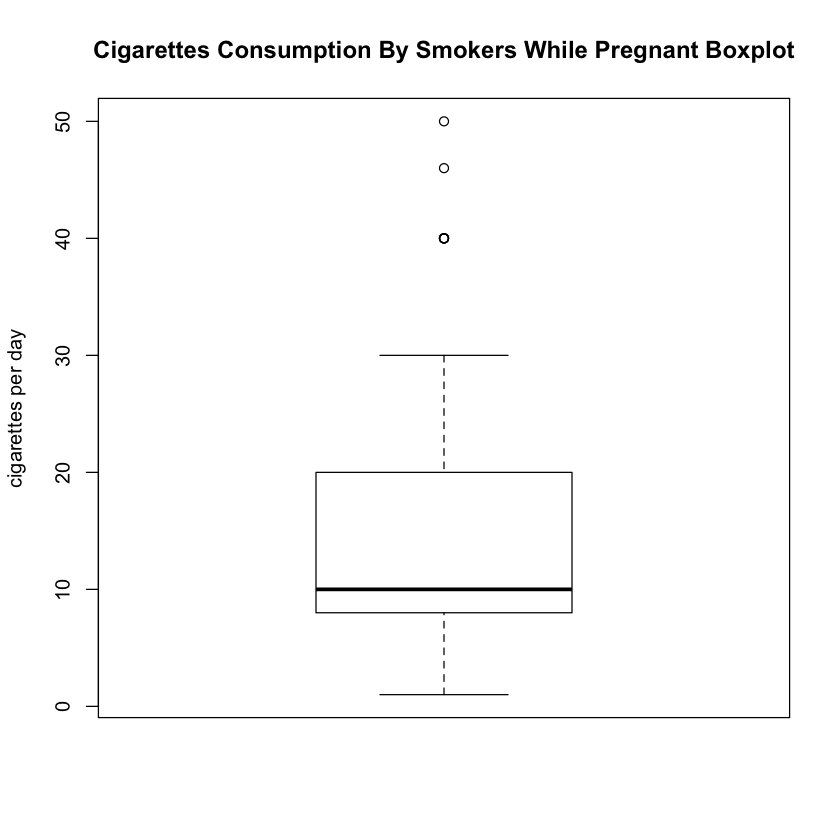

In [47]:
boxplot(data$cigs[data$cigs>0], data=data, main="Cigarettes Consumption By Smokers While Pregnant Boxplot",
        ylab="cigarettes per day")

The cigarettes per day boxplot also indicates a wide spread of data with a number of outliers in the upper consumption range. This boxplot filters out the zero cigarettes per day values.

## Question 5:
Generate a scatterplot of bwght against cigs. Based on the appearance of this plot, how much of the variation in bwght do you think can be explained by cigs?

Warning message:
In smoother(.x, .y, col = col[2], log.x = logged("x"), log.y = logged("y"), : could not fit smooth

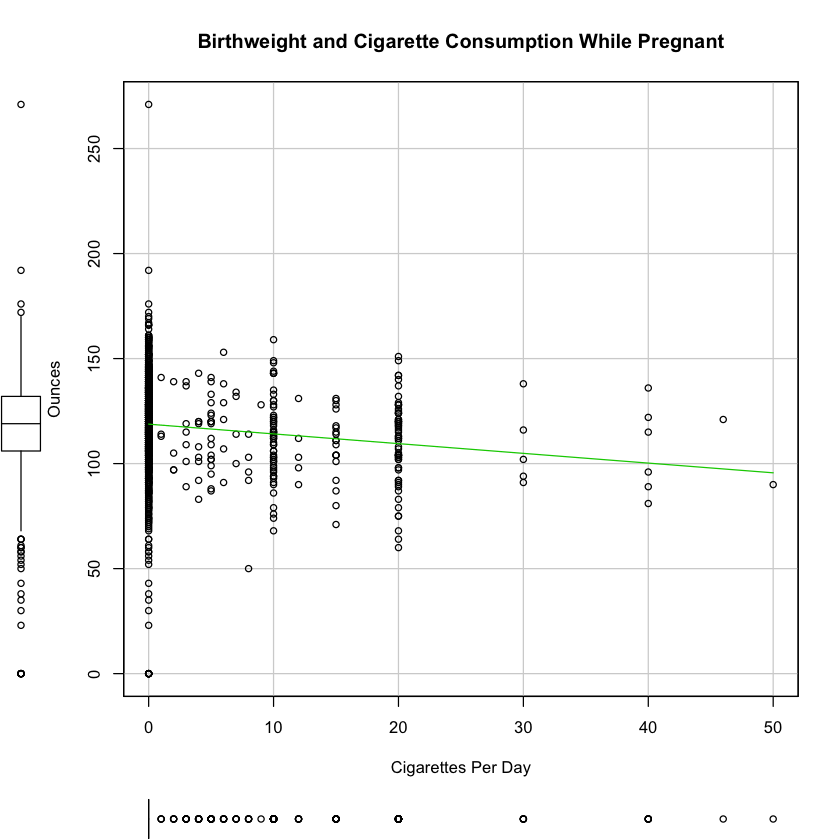

In [55]:
scatterplot(data$cigs, data$bwght,
            main="Birthweight and Cigarette Consumption While Pregnant",
           xlab = "Cigarettes Per Day", ylab="Ounces")

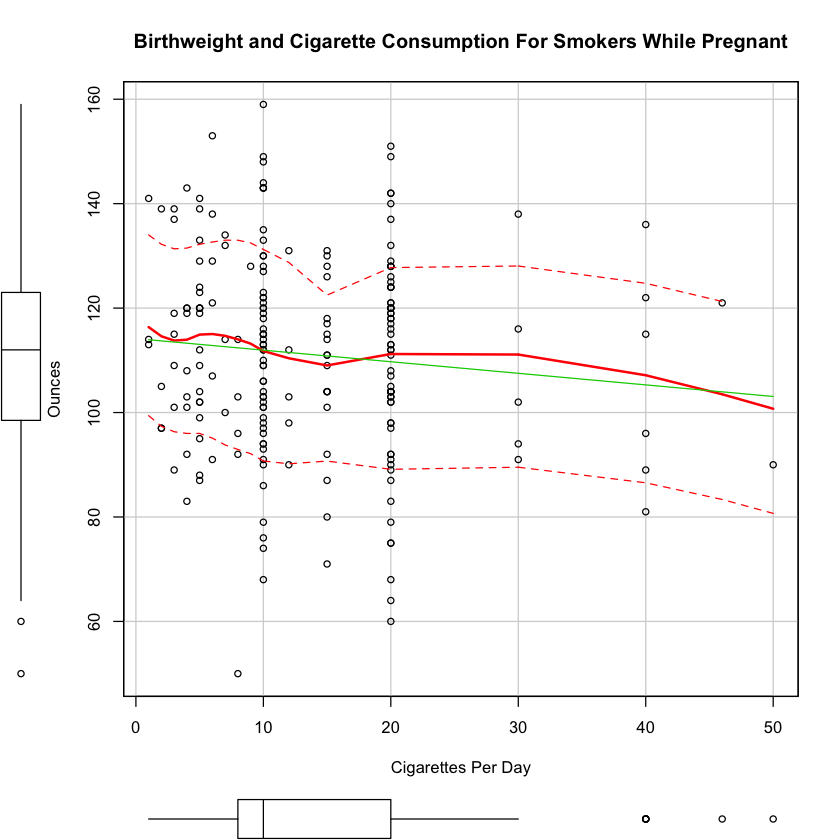

In [54]:
scatterplot(data$cigs[data$cigs>0], data$bwght[data$cigs>0],
            main="Birthweight and Cigarette Consumption For Smokers While Pregnant",
           xlab = "Cigarettes Per Day", ylab="Ounces")

There appears to be less variation in birthweight with cigarette consumption but the data is also skewed such that there are many more samples for zero cigarette consumption by two orders of magnitude. If we replot and filter out the znon-smokers there still is a slight negative correlation between cigarette consumption while pregnant and birthweight.

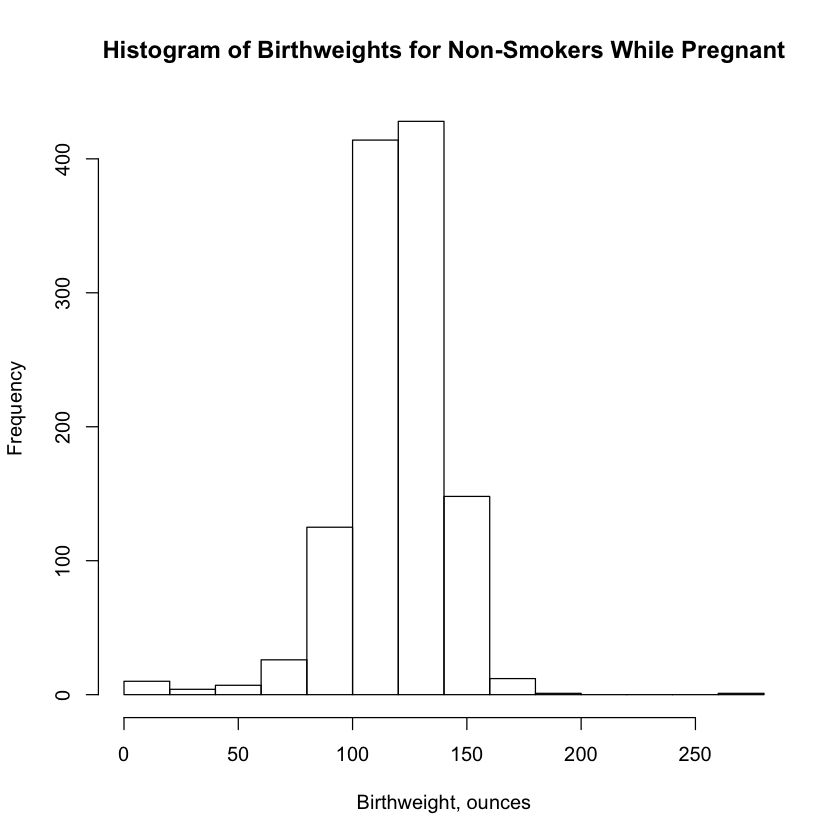

In [34]:
hist(data$bwght[data$cigs==0], main="Histogram of Birthweights for Non-Smokers While Pregnant",
                                xlab="Birthweight, ounces")

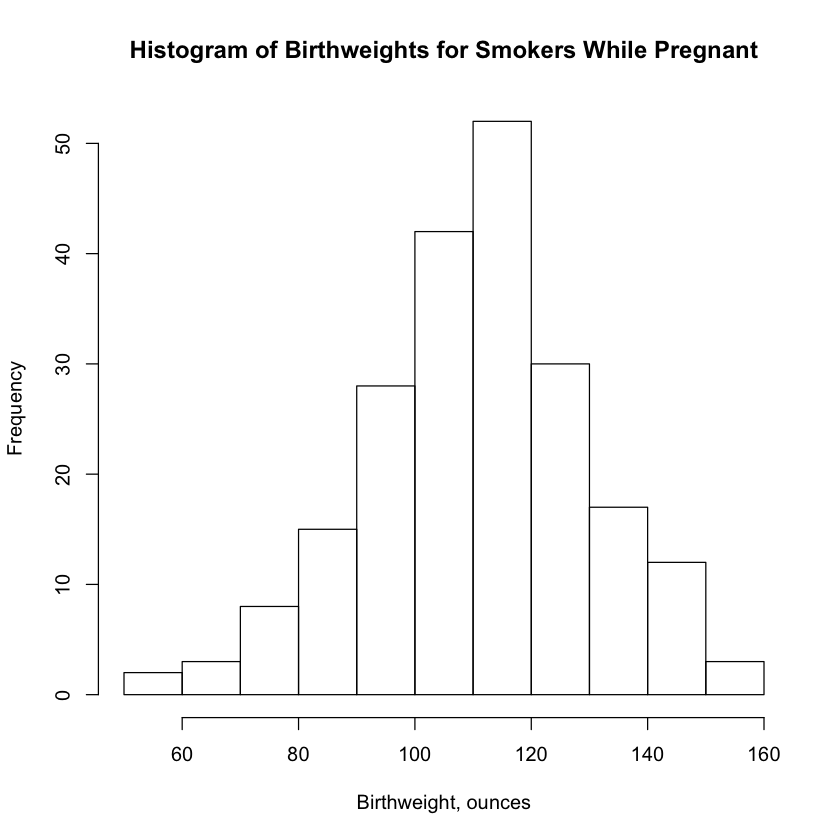

In [53]:
hist(data$bwght[data$cigs>0], main="Histogram of Birthweights for Smokers While Pregnant",
                                xlab="Birthweight, ounces")

The two histograms show how the birthweight samples are distributed for smokers and non-smokers. There is a slightly lower mean for the smokers, but the variance is higher.

## Question 6:
Estimate the simple linear regression of bwght on cigs. What coefficient estimates and the standard errors associated with the coefficient estimates do you get? Interpret the results. Note that you may have to ”take care of” any potential data issues before building a regression model.

In [100]:
d1 <- data[data$bwght>1 & data$bwght<250,]

In [101]:
m1 <- lm(bwght ~ cigs, data=d1)

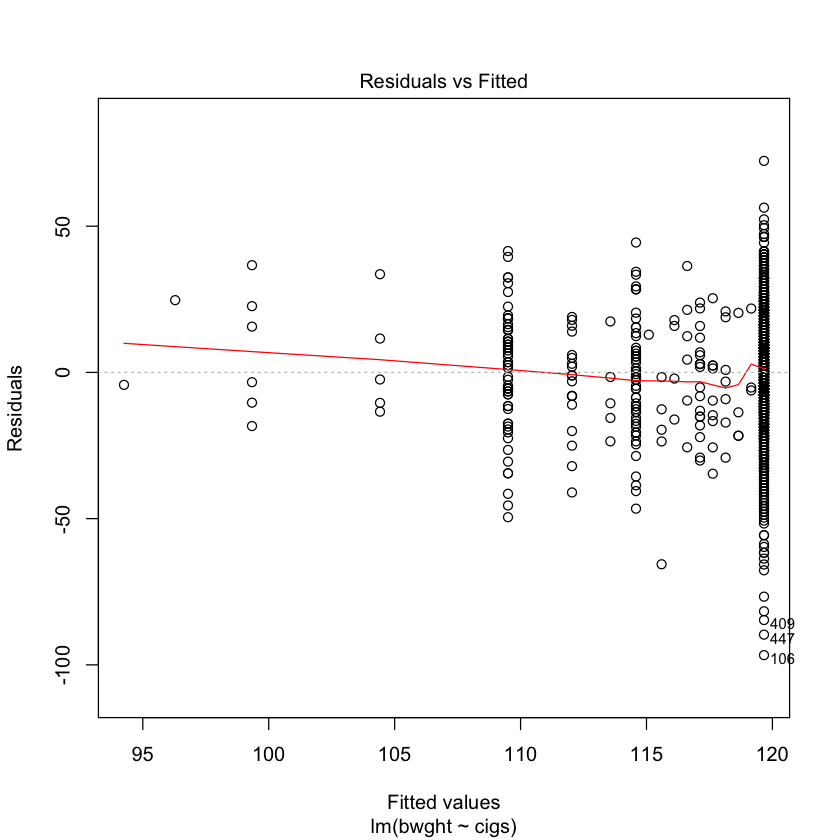

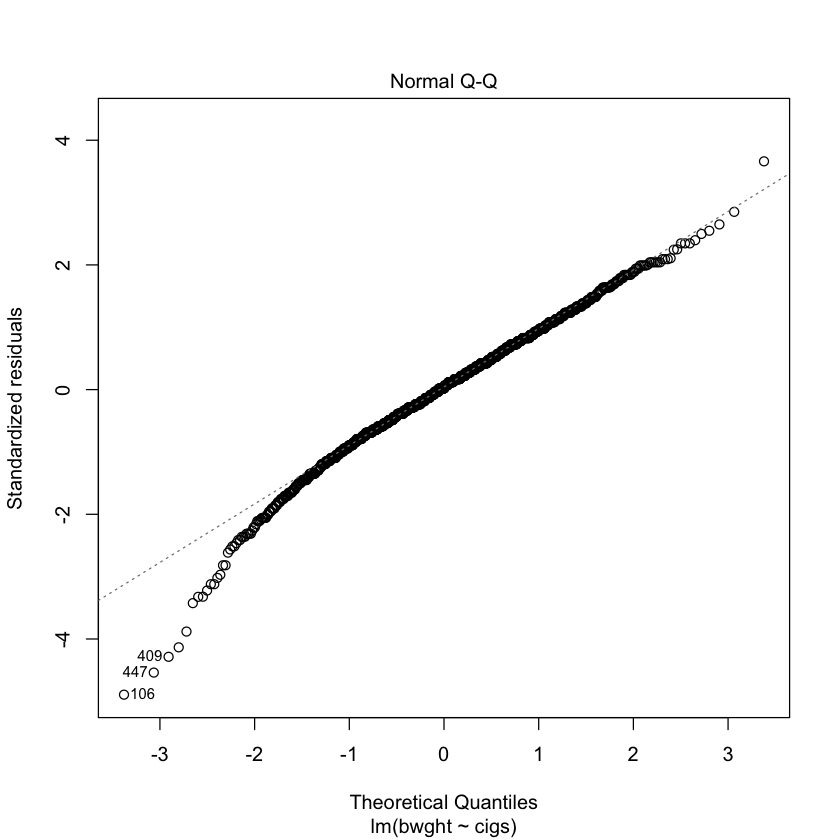

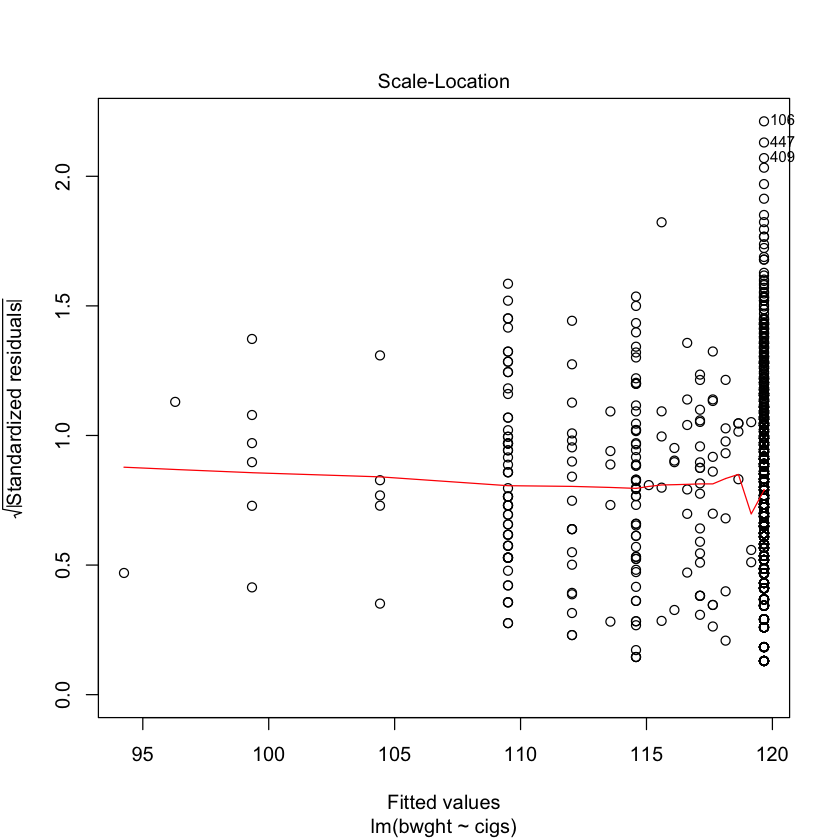

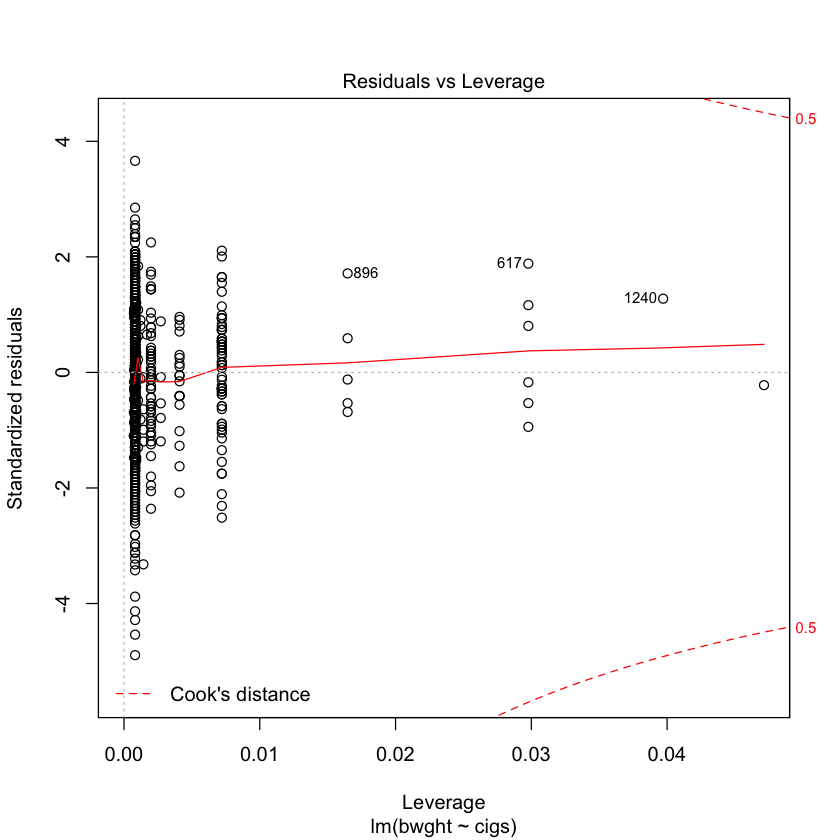

In [102]:
plot(m1)

**Model for entire sample population**

In [103]:
summary(m1)


Call:
lm(formula = bwght ~ cigs, data = d1)

Residuals:
    Min      1Q  Median      3Q     Max 
-96.666 -11.666   0.416  13.334  72.334 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 119.6663     0.5645 211.989  < 2e-16 ***
cigs         -0.5083     0.0889  -5.717 1.32e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 19.76 on 1375 degrees of freedom
Multiple R-squared:  0.02322,	Adjusted R-squared:  0.02251 
F-statistic: 32.69 on 1 and 1375 DF,  p-value: 1.324e-08


**Model for smokers only in sample population**

In [76]:
m1 <- lm(bwght ~ cigs, data=subset(data, cigs>0))

In [77]:
summary(m1)


Call:
lm(formula = bwght ~ cigs, data = subset(data, cigs > 0))

Residuals:
    Min      1Q  Median      3Q     Max 
-62.404 -12.542   0.762  12.010  47.040 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 114.1804     2.4523  46.561   <2e-16 ***
cigs         -0.2220     0.1515  -1.465    0.144    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 19.13 on 210 degrees of freedom
Multiple R-squared:  0.01012,	Adjusted R-squared:  0.005407 
F-statistic: 2.147 on 1 and 210 DF,  p-value: 0.1443


**The model that includes the entire population shows that the intercept is close to the population mean and for every cigarette smoked the birthweight decreases by 0.51 ounces.**

**The model for smokers out of the sample population indicates a weaker influence among that part of the population with an insignificant p value**

**The conclusion we can make from this is that the first cigarette is the most meaningful in terms of the differences in birthweight between smokers and non-smokers while pregnant**

## Question 7:
Now, introduce a new independent variable, faminc, representing family income in thousands of dollars. Examine this variable using the same analysis as in question 3. In addition, produce a scatterplot matrix of bwght, cigs, and faminc. Use the following command (as a starting point):

    library(car)
    scatterplot.matrix(~ bwght + cigs + faminc, data = data2)
    
Note that the car package is needed in order to use the scatterplot.matrix function.

In [78]:
summary(data$faminc)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   0.50   14.50   27.50   29.03   37.50   65.00 

In [79]:
quantile(data$faminc, probs=c(1,5,10,25,50,75,90,99, NA)/100)

1%   5%  10%  25%  50%  75%  90%  99%      
 0.5  3.5  6.5 14.5 27.5 37.5 65.0 65.0   NA

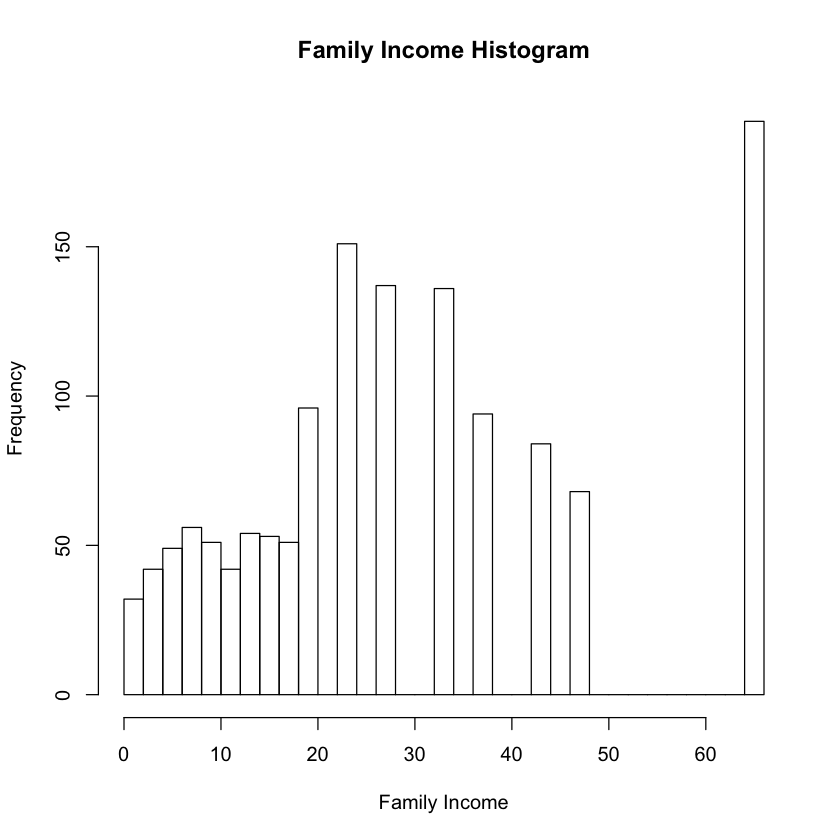

In [102]:
hist(data$faminc, breaks=30, main="Family Income Histogram", xlab="Family Income")

Family income appears to have a dual mode distribution, with the lower income group following a skewed-left distribution and the upper income group showing a very large gap with a big spike in income.

In [81]:
table(data$faminc)


 0.5  1.5  2.5  3.5  4.5  5.5  6.5  7.5  8.5  9.5 10.5 11.5 12.5 13.5 14.5 15.5 
  19   13   22   20   27   22   34   22   23   28   24   18   27   27   22   31 
16.5 17.5 18.5 19.5 22.5 27.5 32.5 37.5 42.5 47.5   65 
  21   30   49   47  151  137  136   94   84   68  192 

**The data seems to indicate a coding error for the value of 65. We see that it is an integer and not a floating point number and there is a large gap between that value and the next lowest. Therefore we will filter out those values greater than 55**

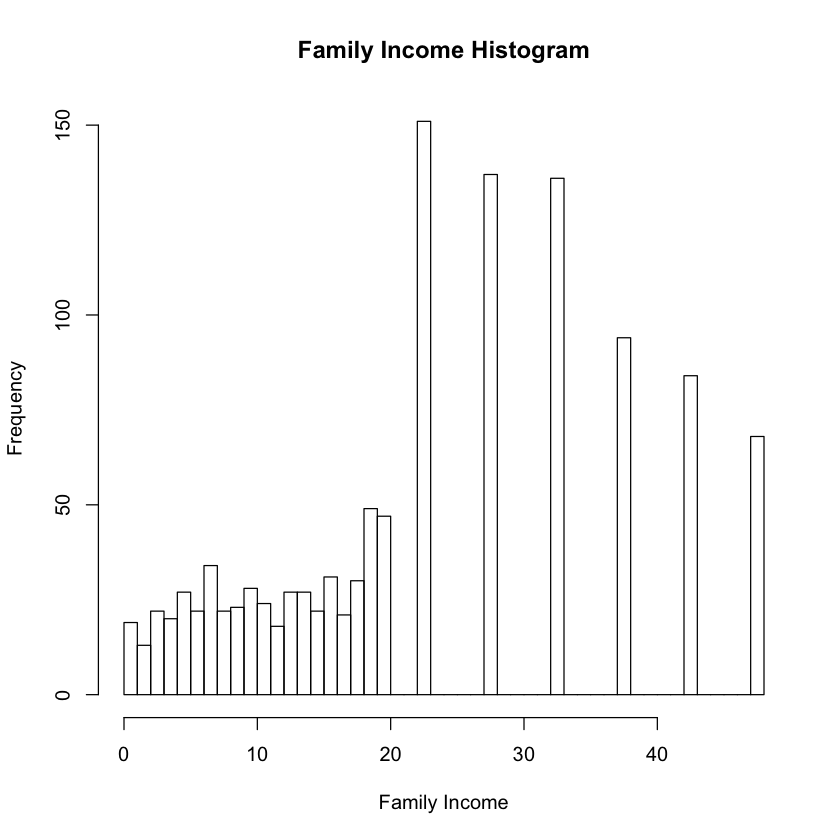

In [87]:
hist(data$faminc[data$faminc < 55], breaks=50, main="Family Income Histogram", xlab="Family Income")

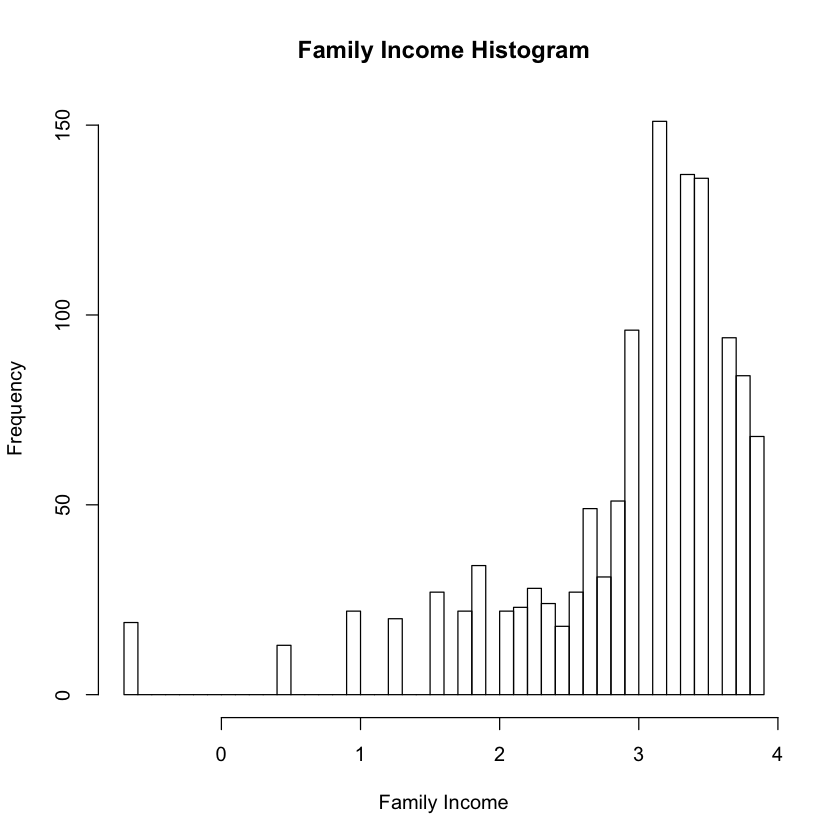

In [88]:
hist(log(data$faminc[data$faminc < 55]), breaks=50, main="Family Income Histogram", xlab="Family Income")

In [91]:
library(car)

Warning message:
In smoother(x, y, col = col[2], log.x = FALSE, log.y = FALSE, spread = spread, : could not fit smoothWarning message:
In smoother(x, y, col = col[2], log.x = FALSE, log.y = FALSE, spread = spread, : could not fit smoothWarning message:
In smoother(x, y, col = col[2], log.x = FALSE, log.y = FALSE, spread = spread, : could not fit smoothWarning message:
In smoother(x, y, col = col[2], log.x = FALSE, log.y = FALSE, spread = spread, : could not fit smooth

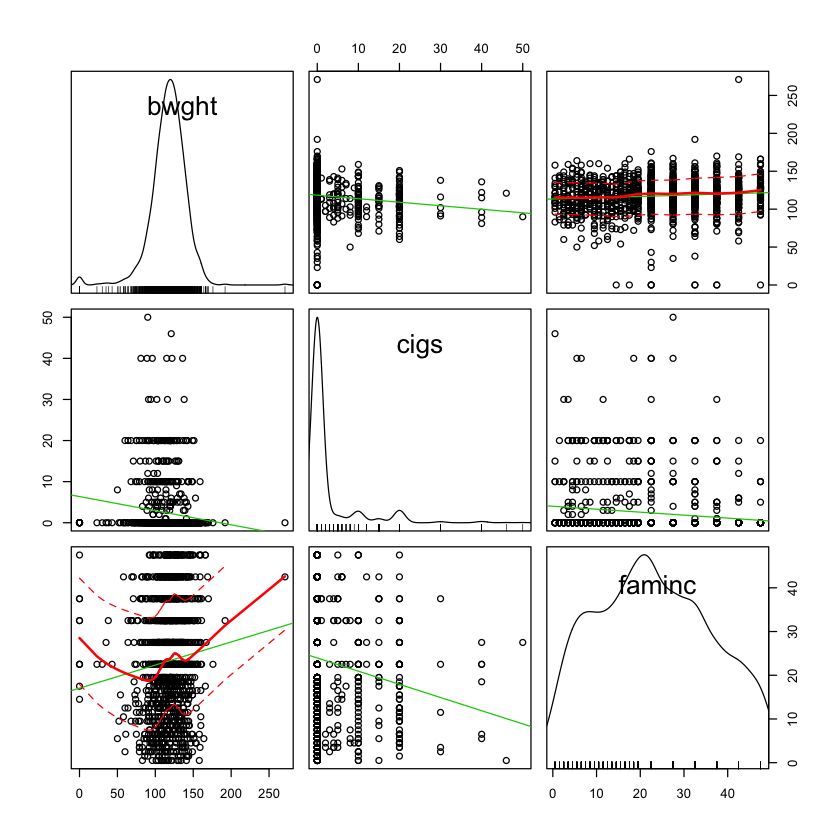

In [90]:
scatterplotMatrix(~ bwght  + cigs + faminc, data=subset(data, faminc<55))

**There appears to be a negative correlation between cigarettes smoked while pregnant and family income**

## Question 8:
Regress bwgth on both cigs and faminc. What coefficient estimates and the standard errors associated with the coefficient estimates do you get? Interpret the results.

In [96]:
d2 <- data[data$faminc<55 & data$bwght>1 & data$bwght<250,]

In [98]:
m2 <- lm(bwght ~ cigs + faminc, data=d2)

In [99]:
summary(m2)


Call:
lm(formula = bwght ~ cigs + faminc, data = d2)

Residuals:
   Min     1Q Median     3Q    Max 
-96.23 -11.35   0.77  13.21  71.21 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 115.70927    1.23968  93.338  < 2e-16 ***
cigs         -0.46955    0.09181  -5.114 3.67e-07 ***
faminc        0.15646    0.04508   3.471 0.000538 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 19.8 on 1182 degrees of freedom
Multiple R-squared:  0.03617,	Adjusted R-squared:  0.03454 
F-statistic: 22.18 on 2 and 1182 DF,  p-value: 3.504e-10


**Birthweight by cigarette consumption is similar to the first model without faminc, but now we see a positive correlation between faminc and birthweight, p < .0005**

## Question 9:
Explain, in your own words, what the coefficient on cigs in the multiple regression means, and how it is different than the coefficient on cigs in the simple regression? Please provide the intuition to explain the difference, if any.


**The cigs coefficient means that, holding the effect of family income constant, each unit of consumption of cigarettes correlates to a drop in birthweight of 0.47 ounces. This is different from the single regression interpretation in that there are no other variable correlations in the model for which to account.**

## Question 10:
Which coefficient for cigs is more negative than the other? Suggest an explanation for why this is so.

**The mulitple regression model cigs coefficient is less negative than the single regression because the multiple regression explains the effects of cigarettes on birthweight after the effect of income has been partialed out**